# PART 1 - Recursive Solution

In [1]:
import re
import unittest
import sys
from time import time

sys.setrecursionlimit(10000000)

In [2]:
def timer_func(func):
    # This function shows the execution time of 
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.10f}s')
        return result
    return wrap_func

In [260]:
@timer_func
def give_change_1(string_input):
    coins = [
        0.01,
        0.02,
        0.05,
        0.10,
        0.20,
        0.50,
        1.00,
        2.00]
    
    coins = [round(coin, 2) for coin in coins]

    def recursive_combo(amount,current_coin=0,counter= 0):
        amount = round(amount,2)
        
        # terminating condition for recursion 1
        if amount == 0.:
            # check if counter is odd
            if counter % 2 == 1:
                return 1
            else:
                return 0

        # terminating condition for recursion 2
        if amount < 0:
            return 0

        # otherwise run below recursivley
        n_combos = 0
        
        # current coin index ensures no duplicate combinations
        for x in range(current_coin,len(coins)):
            if coins[x]> amount:
                continue
            # pass counter as function input
            n_combos += recursive_combo(amount - coins[x],x,counter+1)
        return n_combos
    
    # will only accept string in this pattern
    pattern = r'£\d+\-\d{0,2}'
    formatted_amount = bool(re.search(pattern, string_input))
    
    # parse string and run recursive function
    if formatted_amount:
        pattern = r'£(\d+)\-(\d{0,2})'
        pound = re.search(pattern,string_input).group(1)
        pence = re.search(pattern,string_input).group(2)
        if len(pence) == 1:
            pence = float(pence)*10/100
        elif len(pence) == 2:
            pence = float(pence)/100
        elif len(pence) ==0:
            pence = 0
        amount = float(pound)+float(pence)
        
        amount = round(amount,2)
        
        return recursive_combo(amount)
    
    #otherwise return false    
    else:
        return False

# PART 1 - Recursive Solution w Memoization
£ The purely recursive function seemed to be computationally expensive, so memoization was introduced in order to speed processing

In [261]:
@timer_func
def give_change_2(string_input):
    coins = [
        0.01,
        0.02,
        0.05,
        0.10,
        0.20,
        0.50,
        1.00,
        2.00]
    
    coins = [round(coin, 2) for coin in coins]
    #coins = sorted(coins,reverse=True)

    def recursive_combo(amount, current_coin=0, counter= 0, memo = {}, combo_string=''):
        
        amount = round(amount,2)
        key = '{}_{}'.format(str(amount),str(current_coin)) 
        # otherwise run below recursivley
        if amount == 0:
            
            # check if counter is odd
            if counter % 2 == 1:
                return 1
            else:
                return 0
        
        # terminating condition for recursion 2
        if amount < 0:
            return 0
        
        if key in memo.keys():
            #print((amount,len(coins)),'in',memo)
            return memo[key]
        
        else:
               
            n_combos = 0
            # current coin index ensures no duplicate combinations
           
            for x in range(current_coin,len(coins)):
                if coins[x]> amount:
                    continue
                # pass counter as function input
                n_combos += recursive_combo(round(amount - coins[x],2),x,counter+1,memo)
            memo[key] = n_combos
            return n_combos
    
    # will only accept string in this pattern
    pattern = r'£\d+\-\d{0,2}'
    formatted_amount = bool(re.search(pattern, string_input))
    
    # parse string and run recursive function
    if formatted_amount:
        pattern = r'£(\d+)\-(\d{0,2})'
        pound = re.search(pattern,string_input).group(1)
        pence = re.search(pattern,string_input).group(2)
        if len(pence) == 1:
            pence = float(pence)*10/100
        elif len(pence) == 2:
            pence = float(pence)/100
        elif len(pence) ==0:
            pence = 0
        amount = float(pound)+float(pence)
        
        amount = round(amount,2)
        
        return recursive_combo(amount)
    
    #otherwise return false    
    else:
        return False

In [262]:
# unit tests for easily combinations to mentally calculate, did not run solution until all tests passed
class TestNotebook(unittest.TestCase):
    
    def test(self):
        self.assertEqual(give_change('£0-01'), 1, "Should be 1") #(1)
        self.assertEqual(give_change('£0-02'), 1, "Should be 2") #(2)
        self.assertEqual(give_change('£0-03'), 1, "Should be 1") #(1,1,1)
        self.assertEqual(give_change('£0-04'), 1, "Should be 1") #(1,1,2)
        self.assertEqual(give_change('£0-05'), 3, "Should be 3") #(1,1,1,1,1),,(2,2,1),(5)

# # change function to recursive with memoization
# unit tests before running
give_change = give_change_1

print('Unit test Recursion')
unittest.main(argv=[''], verbosity=2, exit=False)

give_change = give_change_2

print('Unit test Recursion with Memoization')
unittest.main(argv=[''], verbosity=2, exit=False)

test (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
test (__main__.TestNotebook) ... 

Unit test Recursion
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Function 'give_change_1' executed in 0.0000000000s
Unit test Recursion with Memoization
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0000000000s
Function 'give_change_2' executed in 0.0009975433s


ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [263]:
def give_me_change(change_list,give_change):
    for amount in change_list:
        print('{} gives {} odd unique combinations'.format(amount,str(give_change(amount))))

# intial change list
change_list = ['£0-50',
               '£2-',
               # 10 is too slow for the purly recursive function
               #'£100-'
              ]


# # # run first function 
print('Pure Recursion')
give_me_change(change_list,give_change_1)

print('Recursion with Memoization' )
change_list = ['£10-']
give_me_change(change_list,give_change_2) 

Pure Recursion
Function 'give_change_1' executed in 0.0079793930s
£0-50 gives 225 odd unique combinations
Function 'give_change_1' executed in 3.0035371780s
£2- gives 36840 odd unique combinations
Recursion with Memoization
Function 'give_change_2' executed in 0.0625205040s
£10- gives 214691 odd unique combinations


# PART 2 A

## Execution Instructions

1. Run the "predict_consumption" function, include the file path and prediction horizon. for example, predict_consumption('energy.DAT',365)

In [124]:
import joblib
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropCorrelatedFeatures,DropConstantFeatures, DropDuplicateFeatures

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='once') # filter warning during cross validation
warnings.filterwarnings('ignore')

Existing Consumption


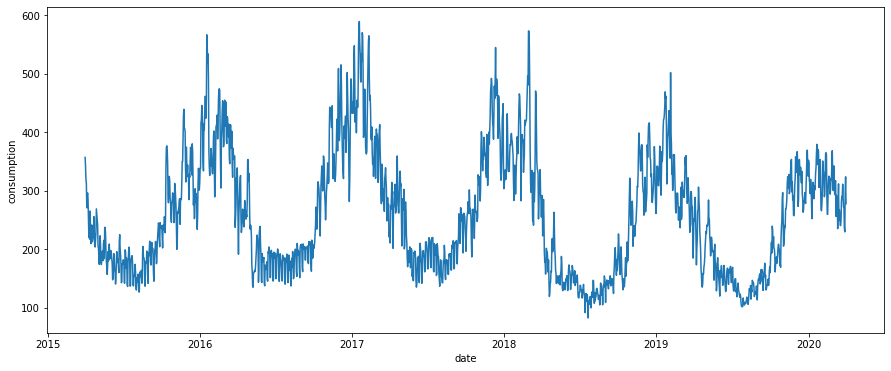

Predicted Consumption for 365 days


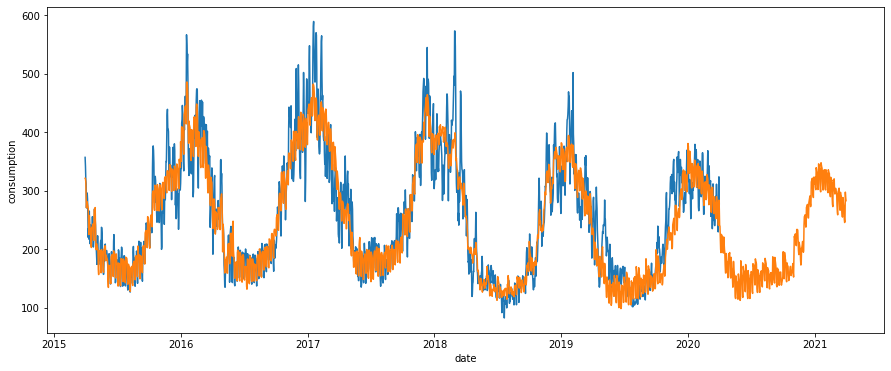

Coeficcient of Determination R^2 of prediction on holdout test data : 0.72


In [126]:
def prepare_time_series(path, visualize=False):
    """
    A function that prepares the input data for modeling
    Input:
        path : path to data 
        visualize: visualize time series
    Output:
        df : pandas dataframe in format that used for modelling
    """
    # read file
    df = pd.read_table(path, sep=",",)
    
    # rename columns, e.g to lower case
    df = df.rename(columns=lambda x:x.lower())

    #convert string date to datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # show 
    if visualize:
        print('Existing Consumption')
        plt.figure(figsize=(15,6))
        sns.lineplot(x='date',y='consumption',data=df)
        plt.show()
    
    return df

def test_train_split(test_split,df):
    """
    A function that completes a test train split that maintains the order of the time series
    Input:
        test_split : percentage of data to maintain for the test data 
        df: data frame to be split
    Output:
        x_train : training features 
        y_train : training values
        x_test : test features
        y_test : test values
    """
    # get number of records
    time_series_length = df.shape[0]

    # calculate index of split
    train_end_index = round(time_series_length*(1-test_split))

    # split to test and train set
    df_train = df.loc[:train_end_index]
    df_test = df.loc[train_end_index:] # hold out set
    
    # create training set
    x_train = df_train.drop(['consumption'],axis=1)
    y_train = df_train[['consumption']]
    
    # create test set
    x_test = df_test.drop(['consumption'],axis=1)
    y_test = df_test[['consumption']]
    
    return x_train, y_train, x_test, y_test


def select_best_model(x_train,y_train,load = True):
    """
    A function that gridsearches a various hyper paramaters of a pipeline
    Input:
        x_train : training features
        y_train : training values
        load : load pre-trained model from file (true) or train new model (false)
    Output:
        x_train : training features 
        y_train : training labels
        x_test : test features
        y_test : test labels
    """
    path = 'model.pkl'
    
    # load local if exists model, else continue training
    if load and os.path.exists(path):
        model = joblib.load(path)
        return model
    
    # date features to be extracted from date
    dt_features_to_extract = [
                                'month',
                                'quarter',
                                'semester',
                                'year',
                                'week',
                                'day_of_week',
                                'day_of_month',
                                'day_of_year',
                                'weekend'
                            ]

    pipeline = Pipeline([
        # extract date time features
        ('date_features', DatetimeFeatures(features_to_extract=dt_features_to_extract,drop_original=True)),
        # standard scaler as we are using a neural net estimator
        ('standard_scaler',StandardScaler()),
        # drop any constant or quasi constant features
        ('drop_constant',DropConstantFeatures()),
        # drop duplicate features
        ('drop_duplicate',DropDuplicateFeatures()),
        # drop correlated features
        ('drop_correlated',DropCorrelatedFeatures()),
        # estimator is neural net
        # chosen as universal function approximator
        ('nn',MLPRegressor(random_state=13)),
    ])

    param_grid = {
        # % of constant values
        'drop_constant__tol':[1,0.99,0.98,0.9],
        # pearsons correlation coefficient
        'drop_correlated__threshold':[0.7,0.8,0.9],
        # generally relu or logistic used
        'nn__activation':['relu','logistic'],
        # used to adjust learning rate automatically
        'nn__learning_rate':['adaptive'],
        # stochastic gradient descent
        'nn__solver':['sgd'],
        # batch size when calculating gradient
        'nn__batch_size':[20,40,60,80,100],
    }
    
    # cross validation that maintains temporal order
    tscv = TimeSeriesSplit(n_splits=5)

    gridsearch_pipeline = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv = tscv,
        # use R^2 as regression problem, is easily interpretable, MRSE is ambiguous
        scoring='r2',
        return_train_score=True
    )
    # search paramater space
    gridsearch_pipeline.fit(x_train,y_train)
    # get best model based on best average r^2 per fold
    model = gridsearch_pipeline.best_estimator_
    # save model
    joblib.dump(model,'model.pkl')
    # show cross validation result
    
    results = pd.DataFrame(gridsearch_pipeline.cv_results_)
    result = results.sort_values(['rank_test_score'])
    print('Results of Hyperparameter Opimization for Neural Net')
    print(results)
    return model


def create_predictions(df,model,prediction_horizon=365):
    """
    A function that takes training data, extends with prediction horizon, and makes predictions
    Input:
        df : training data 
        model : model to make predictions
        prediction horizon : prediction from max date of training data in days
    Output:
        df : containin predictions
    """
    # label training data to distinguish it from predictions data
    df['type'] = 'training'  
    
    # get max date for start of predictions
    max_date = df['date'].max()

    # create prediction dataframe
    prediction_horizon+=1
    prediction_df = pd.DataFrame({'date':pd.date_range(start=max_date, periods=prediction_horizon)})

    #remove previous max record
    prediction_df = prediction_df.iloc[1:]
    
    # label predictions
    prediction_df['type'] = 'prediction'
    
    # concatenate training and pred for visualization
    df = pd.concat([df,prediction_df])
    
    # make prediction
    df['pred'] = model.predict(df[['date']])
    
    # set df index
    df.set_index('date', inplace=True)
    
    # visualize prediction
    print('Predicted Consumption for {} days'.format(str(prediction_horizon-1)))
    plt.figure(figsize=(15,6))
    sns.lineplot(x='date',y='consumption',data=df)
    sns.lineplot(x='date',y='pred',data=df)
    plt.show()
    
    return df


def predict_consumption(path, prediction_horizon, load = True):
    
    """
    A function that takes training data, extends with prediction horizon, and makes predictions
    Input:
        path : path of training data 
        prediction_horizon : prediction from max date of training data in days
        load : load pre-trained model from file (true) or train new model (false)
    Output:
        df : df that contains predictions
    """
    
    # desired test train split
    test_split = 0.2

    # prepare data
    df = prepare_time_series(path,True)
    
    # test train split
    x_train, y_train, x_test, y_test = test_train_split(test_split,df)
    
    # train model, search best hyper paraters for best pipeline
    model = select_best_model(x_train,y_train,load)
    
    # use best model to make predictions
    df = create_predictions(df,model,prediction_horizon)
    
    # view r2 score of test data 
    r2 = r2_score(y_test['consumption'],model.predict(x_test))
    print('Coeficcient of Determination R^2 of prediction on holdout test data : {}'.format(str(round(r2,2))))
    
    return df

path = 'energy.DAT'    

# can test with 365 but also differnt time periods

df = predict_consumption(path,365, True)